# Multiple Linear Regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

### Import packages

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])


### Load dataset

In [2]:
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Nano," and "Micro" categories)


### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

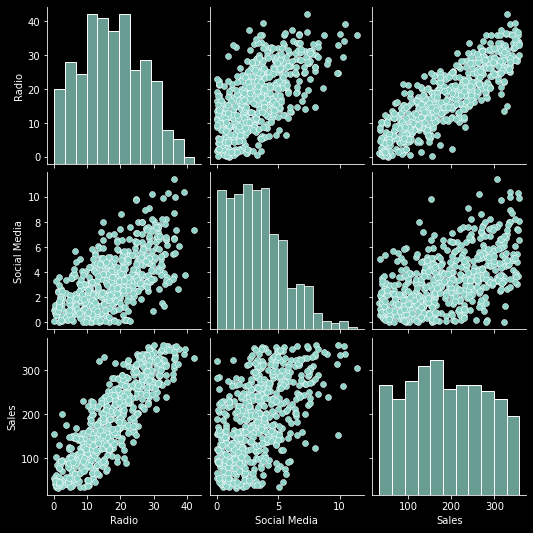

In [3]:
sns.pairplot(data)

**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



not all columns are filled with continuous data, the obvious linear relationship here is Radio.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [4]:
# Calculate the mean sales for each TV category. 
avg_tv = data.groupby('TV')["Sales"].mean()

# Calculate the mean sales for each Influencer category. 
avg_influencers = data.groupby('Influencer')["Sales"].mean()

In [5]:
avg_tv

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

In [6]:
avg_influencers

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



TV has clear differences, you would need high variance for influencers.

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [7]:
data.dropna(axis=0, inplace=True)

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [8]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [9]:
data.rename(columns={'Social Media':'Social_Media'}, inplace=True)

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [10]:
# Import the statsmodel module.
import statsmodels.api as sm
# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

In [11]:
# Define the OLS formula.
formula = 'Sales ~ C(TV) + Radio + Social_Media + C(Influencer)'

# Create an OLS model.
OLS = ols(formula, data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
summary = model.summary()

# Display the model results.
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 29 May 2023   Prob (F-statistic):          1.82e-282
Time:                        05:31:22   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                217

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

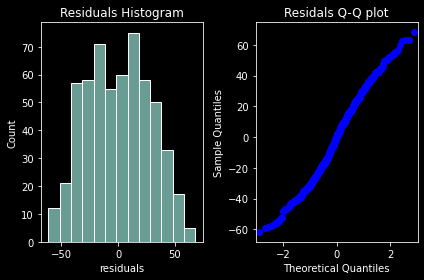

In [12]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figures.
fig, axes = plt.subplots(nrows=1, ncols=2)
# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel('residuals')
# Set the title of the residual plot.
axes[0].set_title('Residuals Histogram')
# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, ax=axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Residals Q-Q plot')
# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
# Show the plot.
plt.show()

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

<function matplotlib.pyplot.show(*args, **kw)>

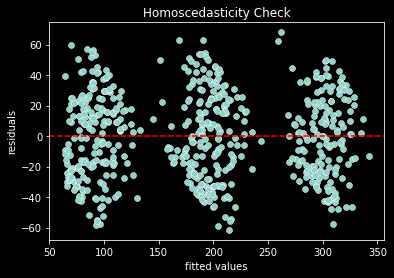

In [13]:
# Create a scatterplot with the fitted values from the model and the residuals.
sns.scatterplot(model.fittedvalues, residuals)

# Set the x-axis label.
plt.xlabel('fitted values')
# Set the y-axis label.
plt.ylabel('residuals')
# Set the title.
plt.title("Homoscedasticity Check")
# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y=0, color='r', linestyle='--', label='Threshold')

# Show the plot.
plt.show

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# Calculate the variance inflation factor (optional).
data_vif = data[['Radio','Social_Media']]

vif = pd.DataFrame()
vif["Variable"] = data_vif.columns
vif["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(data_vif.shape[1])]

In [16]:
vif

,Variable,VIF
0,Radio,5.170922
1,Social_Media,5.170922


The VIF values quantify the extent of multicollinearity. Typically, a VIF greater than 5 or 10 indicates high multicollinearity.

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [17]:
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 29 May 2023   Prob (F-statistic):          1.82e-282
Time:                        05:31:22   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                217

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



The default `TV` category for the model is `High` since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` or `Low` `TV` categories compared to the `High` `TV` category when `Radio` is at the same level.

For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average compared to a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.


**Question:** Why is it important to interpret the beta coefficients?



Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

## Conclusion

**How would you frame your findings to external stakeholders?**

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).